In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\vaishnavi\COLLEGE PRACTICAL\housing.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 9 numeric and only 1 categorical variable

In [6]:
df.isnull().sum().sort_values(ascending=False)

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There are 207 missing values in column 'total_bedrooms'

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.select_dtypes(np.number).skew()[abs(df.select_dtypes(np.number).skew()) > 0.75]

total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64

These are highly skewed columns which will require transformation

<AxesSubplot:>

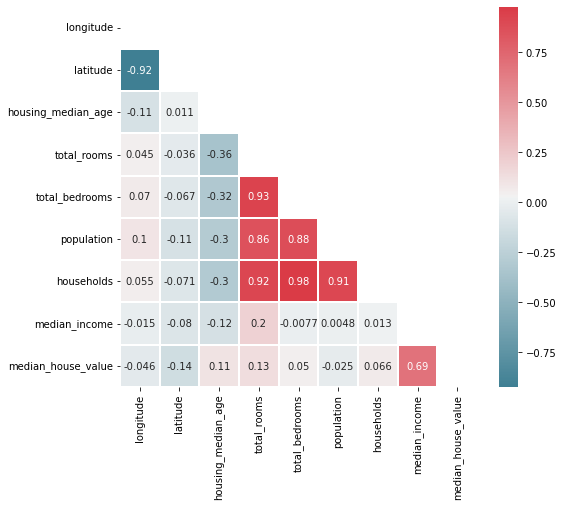

In [9]:
corr = df.corr()
matrix = np.triu(corr)
plt.figure(figsize=(8,7))
cmap = sns.diverging_palette(220,10,75, as_cmap=True, center = 'light')
sns.heatmap(df.corr(), cmap = cmap, linecolor= 'white', linewidths=2, mask=matrix, annot=True)

Some of the independent variables are highly correlated which can have a negative impact on regression model

<AxesSubplot:xlabel='households', ylabel='total_bedrooms'>

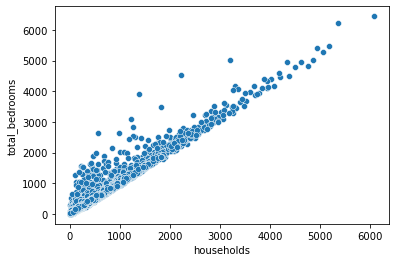

In [10]:
#Checking households vs total_bedrooms
sns.scatterplot(data=df, x = 'households', y = 'total_bedrooms')

<AxesSubplot:xlabel='total_rooms', ylabel='total_bedrooms'>

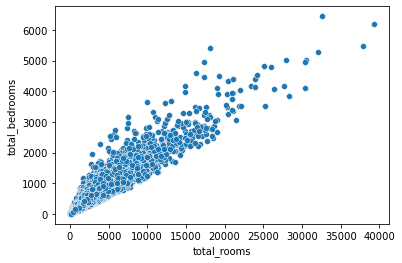

In [11]:
#checking total_rooms vs total_bedrooms
sns.scatterplot(data=df, x = 'total_rooms', y = 'total_bedrooms')

These two columns have a positive correlation

array([<AxesSubplot:title={'center':'housing_median_age'}>,
       <AxesSubplot:title={'center':'total_rooms'}>,
       <AxesSubplot:title={'center':'total_bedrooms'}>,
       <AxesSubplot:title={'center':'population'}>,
       <AxesSubplot:title={'center':'households'}>,
       <AxesSubplot:title={'center':'median_income'}>,
       <AxesSubplot:title={'center':'median_house_value'}>], dtype=object)

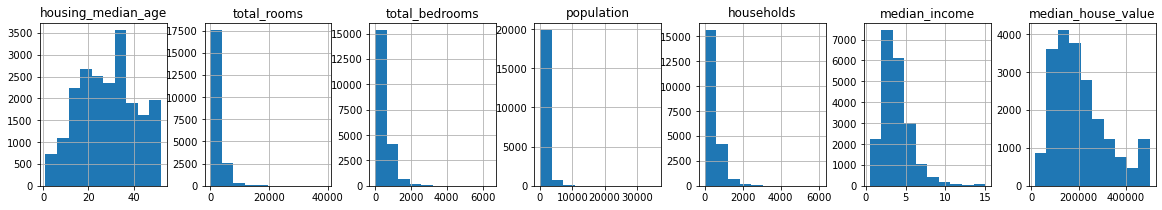

In [12]:
fig, (axes) = plt.subplots(1,7, figsize=(20,3))
df.drop(['latitude', 'longitude', 'ocean_proximity'], axis=1).hist(ax=axes)

There are a lot of skewed columns which will require transformations, as found before.

In [13]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Exploring data

<AxesSubplot:xlabel='housing_median_age', ylabel='Density'>

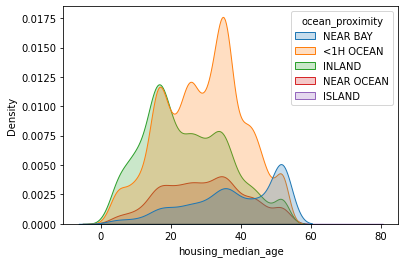

In [14]:
sns.kdeplot(x = df['housing_median_age'], fill=True, hue=df['ocean_proximity'])

<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

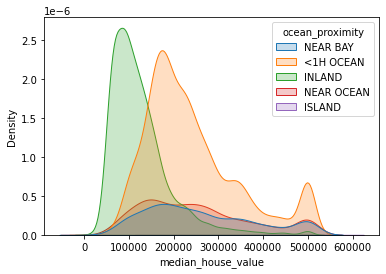

In [15]:
sns.kdeplot(x=df['median_house_value'], hue=df['ocean_proximity'],fill=True )

1)Most of the inland houses have a low median_house_value, followed by Ocean proximity houses

In [16]:
a = df.groupby(by='ocean_proximity')
a.mean()['median_house_value'].sort_values()

ocean_proximity
INLAND        124805.392001
<1H OCEAN     240084.285464
NEAR OCEAN    249433.977427
NEAR BAY      259212.311790
ISLAND        380440.000000
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='ocean_proximity', ylabel='population'>

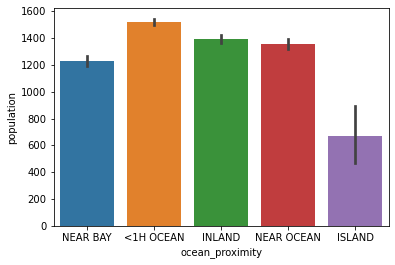

In [17]:
sns.barplot(data=df,x='ocean_proximity', y='population' )

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_income'>

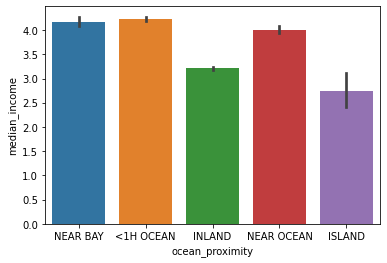

In [18]:
sns.barplot(data=df, x='ocean_proximity', y='median_income')

Treating Missing Values

<AxesSubplot:>

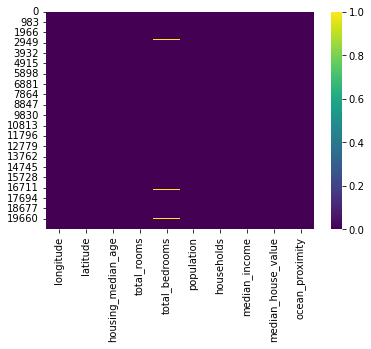

In [19]:
sns.heatmap(df.isnull(), cmap='viridis')

In [20]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:xlabel='total_bedrooms', ylabel='Count'>

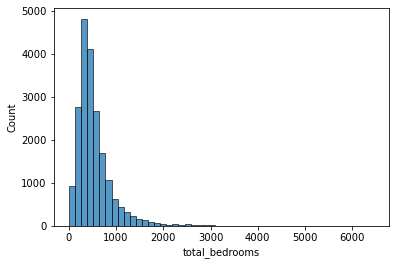

In [21]:
sns.histplot(df['total_bedrooms'], bins=50)

In [22]:
df['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [23]:
df.shape

(20640, 10)

In [24]:
#Out of 20640, 207 which is almost 1% of total values in missing hence can be dropped 
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop('index', inplace=True, axis=1)

In [25]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20432,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


Encoding Categorial Variable

In [26]:
df_encod = pd.get_dummies(df['ocean_proximity'], drop_first=True)

In [27]:
df_encod.head()

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [28]:
df = pd.concat([df_encod, df], axis=1)

In [29]:
df.head()

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,0,1,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,0,0,1,0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,0,0,1,0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,0,0,1,0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,0,0,1,0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [30]:
df.drop('ocean_proximity', axis=1, inplace=True)

In [31]:
df.columns = ['inland', 'island', 'near bay', 'near ocean', 'longitude',
       'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_house_value']

In [32]:
df.head()

,inland,island,near bay,near ocean,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,0,1,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,0,0,1,0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,0,0,1,0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,0,0,1,0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,0,0,1,0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


Removing Skewness

In [33]:
num_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

In [34]:
df[num_cols].skew()[abs(df[num_cols].skew().values) > 0.75]

total_rooms           4.158816
total_bedrooms        3.459546
population            4.960017
households            3.413850
median_income         1.644557
median_house_value    0.978290
dtype: float64

In [35]:
skewed_cols = df[num_cols].skew()[abs(df[num_cols].skew().values) > 0.75].index.to_list()

In [36]:
skewed_cols

['total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [37]:
#Checking if any column has non positive values
df[skewed_cols].describe()

,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [38]:
from scipy.stats import boxcox

In [39]:
for col in skewed_cols:
    bc_result = boxcox(df[col])
    print(pd.DataFrame(bc_result[0]).skew())

0    0.124564
dtype: float64
0    0.112714
dtype: float64
0    0.114033
dtype: float64
0    0.116865
dtype: float64
0    0.004938
dtype: float64
0   -0.012096
dtype: float64


Boxcox is removing skewness from all the columns hence can be applied

In [40]:
lambda_dict = {}

In [41]:
for col in skewed_cols:
    #applying transformation
    bc_result = boxcox(df[col])
    #removing original skewed column
    df.drop(col, axis=1, inplace=True)
    #adding transformed column to the dataframe
    df[col] = bc_result[0]
    #saving the lambda in dictionary
    lambda_dict[col] = bc_result[1]
    

In [42]:
lambda_dict

{'total_rooms': 0.22085037222482323,
 'total_bedrooms': 0.22469488584095776,
 'population': 0.23589636454109378,
 'households': 0.24538271216646682,
 'median_income': 0.09188496766542596,
 'median_house_value': 0.12427377943115578}

In [43]:
df[num_cols].skew()[abs(df[num_cols].skew().values) > 0.75]

Series([], dtype: float64)

There are no skewed columns in dataframe now

In [44]:
df.head()

,inland,island,near bay,near ocean,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,0,1,0,-122.23,37.88,41.0,15.711183,8.812635,12.313702,9.276867,2.339704,32.548715
1,0,0,1,0,-122.22,37.86,21.0,27.567255,17.043806,22.349787,18.837657,2.336226,31.389704
2,0,0,1,0,-122.24,37.85,52.0,18.129399,10.018273,14.089610,10.438155,2.173976,31.301520
3,0,0,1,0,-122.25,37.85,52.0,17.434442,10.726091,14.606008,11.216602,1.875594,31.149476
4,0,0,1,0,-122.25,37.85,52.0,18.653359,11.335470,14.661511,11.859220,1.434004,31.162306


Test train split and scaling

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
X.head()

,inland,island,near bay,near ocean,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0,0,1,0,-122.23,37.88,41.0,15.711183,8.812635,12.313702,9.276867,2.339704
1,0,0,1,0,-122.22,37.86,21.0,27.567255,17.043806,22.349787,18.837657,2.336226
2,0,0,1,0,-122.24,37.85,52.0,18.129399,10.018273,14.089610,10.438155,2.173976
3,0,0,1,0,-122.25,37.85,52.0,17.434442,10.726091,14.606008,11.216602,1.875594
4,0,0,1,0,-122.25,37.85,52.0,18.653359,11.335470,14.661511,11.859220,1.434004


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc_x = StandardScaler()
sc_y = StandardScaler()

In [51]:
X.select_dtypes(np.number).nunique()[X.select_dtypes(np.number).nunique().values > 2]

longitude               844
latitude                861
housing_median_age       52
total_rooms            5911
total_bedrooms         1923
population             3879
households             1809
median_income         12825
dtype: int64

In [52]:
scale_cols =X.select_dtypes(np.number).nunique()[X.select_dtypes(np.number).nunique().values > 2].index.to_list()

In [53]:
X_train[scale_cols] = sc_x.fit_transform(X_train[scale_cols])
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [54]:
X_train

,inland,island,near bay,near ocean,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5595,0,0,0,1,0.645764,-0.896932,-0.601993,0.192170,0.700453,0.530985,0.724340,-1.037626
12195,1,0,0,0,1.504492,-0.939081,-1.474892,-1.792804,-2.039565,-2.174530,-2.056571,1.268040
2324,1,0,0,0,-0.043216,0.545508,-1.951019,-0.724615,-0.973196,-0.865629,-0.992977,0.738616
12314,1,0,0,0,1.784078,-0.999963,-0.363929,0.459427,1.194246,2.032226,1.228434,-1.460304
13381,1,0,0,0,1.125054,-0.709602,0.112198,0.098410,-0.298623,0.026534,-0.421580,-0.938114
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,0,0,0,0.805527,-0.901615,-0.363929,0.462461,0.158451,0.274627,0.110770,0.945778
11964,0,0,0,0,1.020209,-0.882882,-1.871664,1.553763,1.327766,1.629579,1.407684,0.672365
5390,0,0,0,0,0.580860,-0.765801,1.064451,-0.425320,-0.276011,-0.314192,-0.212537,-0.267895
860,0,0,1,0,-1.226463,0.901435,-1.316183,1.515377,1.376058,1.727016,1.506326,0.887520


In [55]:
y_train

array([[ 0.52213793],
       [ 1.18780195],
       [-0.7927343 ],
       ...,
       [ 1.13100943],
       [ 0.4363375 ],
       [ 0.5928791 ]])

In [56]:
X_test[scale_cols] = sc_x.transform(X_test[scale_cols])
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Regression Models

Linear Regression Model

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X.select_dtypes(np.number).nunique()[X.select_dtypes(np.number).nunique().values > 2]

scale_cols =X.select_dtypes(np.number).nunique()[X.select_dtypes(np.number).nunique().values > 2].index.to_list()

X_train[scale_cols] = sc_x.fit_transform(X_train[scale_cols])
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))

X_test[scale_cols] = sc_x.transform(X_test[scale_cols])
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
regressor = LinearRegression()

In [60]:
model_lr = regressor.fit(X_train, y_train)

In [61]:
y_pred = model_lr.predict(X_train)

In [62]:
from sklearn.metrics import r2_score, mean_squared_error

In [63]:
r2_score(y_train, y_pred)

0.6897454858247922

In [64]:
np.sqrt(mean_squared_error(y_train, y_pred))

0.5570049498659844

In [65]:
y_pred_lr_test = model_lr.predict(X_test)

In [66]:
r2_score_lr = r2_score(y_test, y_pred_lr_test)

In [67]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))

In [68]:
r2_score_lr

0.6991073958528304

In [69]:
rmse_lr

0.5511431833325939

In [70]:
sns.set_style('darkgrid')

In [71]:
def plot_dist_residual(x):
    plt.figure(figsize=(7,5))
    sns.histplot(data=x, legend=False, bins=50)
    plt.title(f'Distribution of residual')
    plt.text(5, 500, f"Skewness : {round(x[0].skew(),2)}", horizontalalignment='left', size='large', color='black')

In [72]:
def plot_residual_plot(x):
    sns.scatterplot(data=x, legend=False)
    plt.title('Residual plot')
    plt.text(8000, 0, 'No trend in plot', size='large')

In [73]:
res_lr = pd.DataFrame(y_test-y_pred_lr_test)

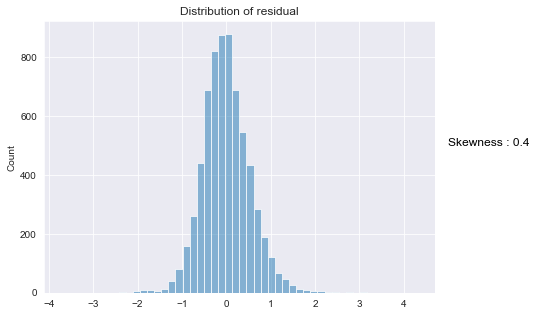

In [74]:
plot_dist_residual(res_lr)

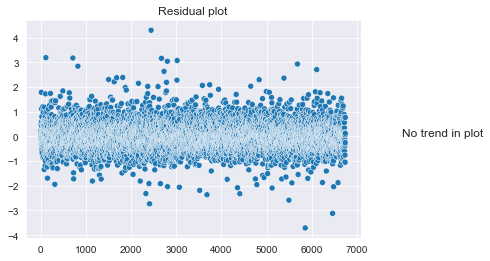

In [75]:
plot_residual_plot(res_lr)

KNN Model

In [76]:
from sklearn.neighbors import KNeighborsRegressor

In [77]:
scores_r2= []
scores_rmse = []

In [78]:
for i in range(1,40):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    scores_r2.append(score)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores_rmse.append(score)
    

Text(0.5, 1.0, 'R-squared values')

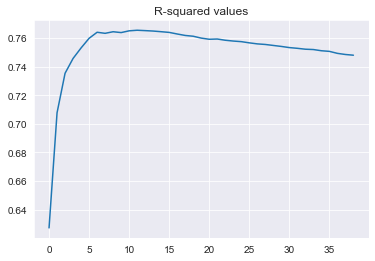

In [79]:
plt.plot(scores_r2)
plt.title('R-squared values')

Text(0.5, 1.0, 'RMSE Values')

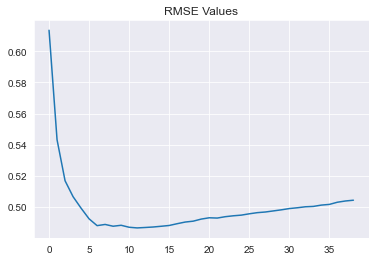

In [80]:
plt.plot(scores_rmse)
plt.title('RMSE Values')

In [81]:
scores_r2 = pd.DataFrame(scores_r2)

In [82]:
scores_r2.columns = ['R2-score']

In [83]:
scores_rmse = pd.DataFrame(scores_rmse)

In [84]:
scores_rmse.columns = ['RMSE']

In [85]:
KNN_results = pd.concat([scores_r2, scores_rmse], axis=1)

In [86]:
KNN_results

,R2-score,RMSE
0,0.627210,0.613467
1,0.707694,0.543223
2,0.735320,0.516916
3,0.745685,0.506693
4,0.753034,0.499318
5,0.759764,0.492467
6,0.763987,0.488120
7,0.763247,0.488885
8,0.764352,0.487742
9,0.763765,0.488350


at k=11, we are getting best results

In [87]:
KNN_model = KNeighborsRegressor(11)

In [88]:
KNN_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [89]:
y_pred = KNN_model.predict(X_train)

In [90]:
r2_score(y_train, y_pred)

0.7988803332844159

In [91]:
np.sqrt(mean_squared_error(y_train, y_pred))

0.4484636737970915

In [92]:
y_pred_KNN_test = KNN_model.predict(X_test)

In [93]:
r2_score_KNN = r2_score(y_test, y_pred_KNN_test)

In [94]:
rmse_KNN = np.sqrt(mean_squared_error(y_test, y_pred_KNN_test))

In [95]:
r2_score_KNN

0.764988565870085

In [96]:
rmse_KNN

0.4870832332067718

In [97]:
res_KNN = pd.DataFrame(y_test-y_pred_KNN_test)

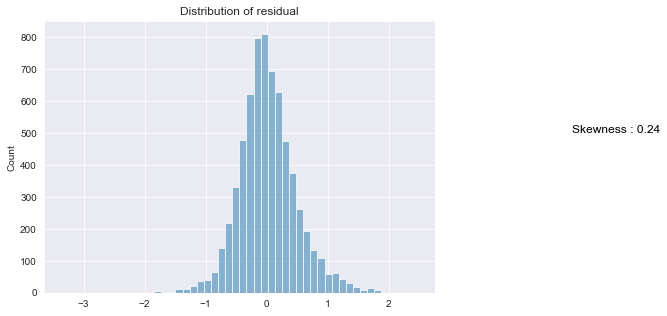

In [98]:
plot_dist_residual(res_KNN)

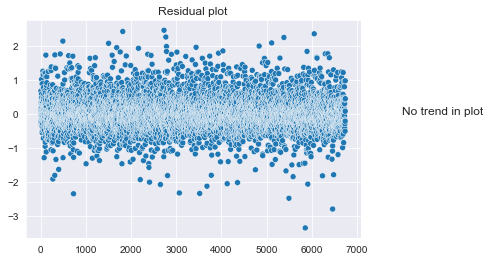

In [99]:
plot_residual_plot(res_KNN)

Decision Tree

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [101]:
dt = DecisionTreeRegressor()

In [102]:
model_dt = dt.fit(X_train, y_train)

In [103]:
y_pred_dt_train = model_dt.predict(X_train)

In [104]:
r2_score(y_train, y_pred_dt_train)

1.0

In [105]:
np.sqrt(mean_squared_error(y_train, y_pred_dt_train))

9.793187839460874e-17

In [106]:
dt.tree_.max_depth

32

In [107]:
dt.feature_importances_

array([0.31643449, 0.        , 0.00055366, 0.00577041, 0.1062143 ,
       0.11627217, 0.03297011, 0.02149341, 0.01543858, 0.02670359,
       0.0148128 , 0.34333647])

In [108]:
param_dt = {
    'max_depth' : range(1,dt.tree_.max_depth +1),
    'max_features' : range(1, len(dt.feature_importances_)+1),
    'min_samples_split':[10,50,60,70],
    'min_samples_leaf': [10,20,30,50]
}

In [109]:
dt = DecisionTreeRegressor(max_depth=15,
                          max_features=11,
                          min_samples_leaf=10,
                          min_samples_split=10)

In [110]:
model_dt = dt.fit(X_train, y_train)

In [111]:
y_pred_dt_train = model_dt.predict(X_train)

In [112]:
r2_score(y_train, y_pred_dt_train)

0.8752195892568982

In [113]:
np.sqrt(mean_squared_error(y_train, y_pred_dt_train))

0.35324270798291335

In [114]:
y_pred_dt_test = model_dt.predict(X_test)

In [115]:
r2_score_dt = r2_score(y_test, y_pred_dt_test)

In [116]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt_test))

In [117]:
r2_score_dt

0.7711736590416667

In [118]:
rmse_dt

0.48063090384203916

In [119]:
res_dt = pd.DataFrame(y_test-y_pred_dt_test.reshape(len(y_pred_dt_test),1))

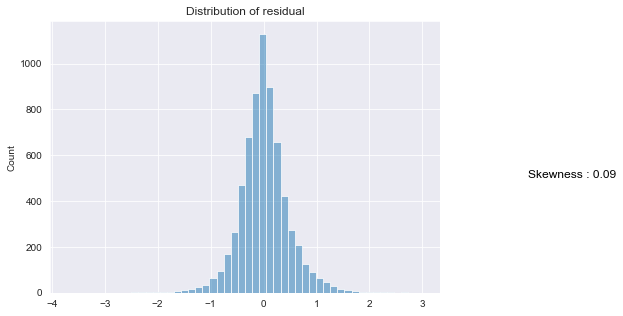

In [120]:
plot_dist_residual(res_dt)

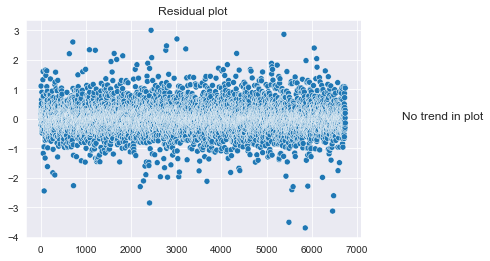

In [121]:
plot_residual_plot(res_dt)

Compairing Results

In [122]:
final_result = pd.DataFrame(index=['LinearRegression',  'KNN model', 'DecisionTree'])

In [123]:
final_result['r2_score'] = [r2_score_lr,  r2_score_KNN, r2_score_dt]

In [124]:
final_result['RMSE'] = [rmse_lr, rmse_KNN, rmse_dt]

In [125]:
final_result

,r2_score,RMSE
LinearRegression,0.699107,0.551143
KNN model,0.764989,0.487083
DecisionTree,0.771174,0.480631
